# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [135]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time

In [136]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [137]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [138]:
#Gather the html from the current page in the browser
html = browser.html

In [139]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [140]:
table = soup.find('table')

In [141]:
# Extract all rows of data
data = []
for row in table.find_all('tr'):
    # Extract data from each cell in the row
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    if row_data:  # Only append if row_data is not empty
        data.append(row_data)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [142]:
# Create a DataFrame from the scraped data
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df = pd.DataFrame(data, columns=columns)

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [143]:
# Examine the data types
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [144]:
# Convert data types if necessary
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [145]:
# Display the DataFrame
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [147]:
# 1. How many months are there on Mars?
num_months = mars_df['month'].nunique()
print(f"Number of months on Mars: {num_months}")

Number of months on Mars: 12


In [148]:
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
num_martian_days = mars_df['sol'].nunique()
print(f"Number of Martian days in the dataset: {num_martian_days}")

Number of Martian days in the dataset: 1867


In [149]:
# Find the average minimum daily temperature for all months
average_min_temp = mars_df.groupby('month')['min_temp'].mean()
average_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

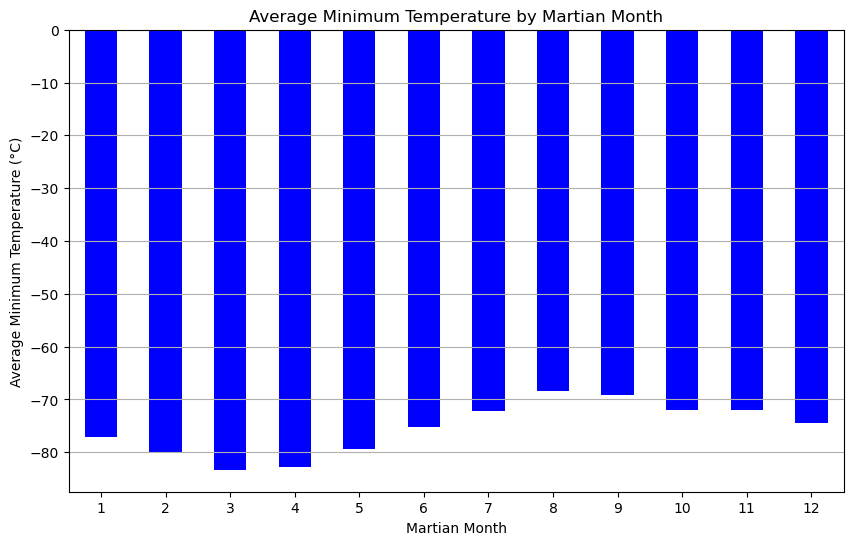

In [150]:
# Plot the average minimum temperature by month
average_min_temp.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [151]:
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?

# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = average_min_temp.idxmin()
warmest_month = average_min_temp.idxmax()
print(f"Coldest month on Mars: Month {coldest_month}, Average Min Temp: {average_min_temp[coldest_month]:.2f} °C")
print(f"Warmest month on Mars: Month {warmest_month}, Average Min Temp: {average_min_temp[warmest_month]:.2f} °C")

Coldest month on Mars: Month 3, Average Min Temp: -83.31 °C
Warmest month on Mars: Month 8, Average Min Temp: -68.38 °C


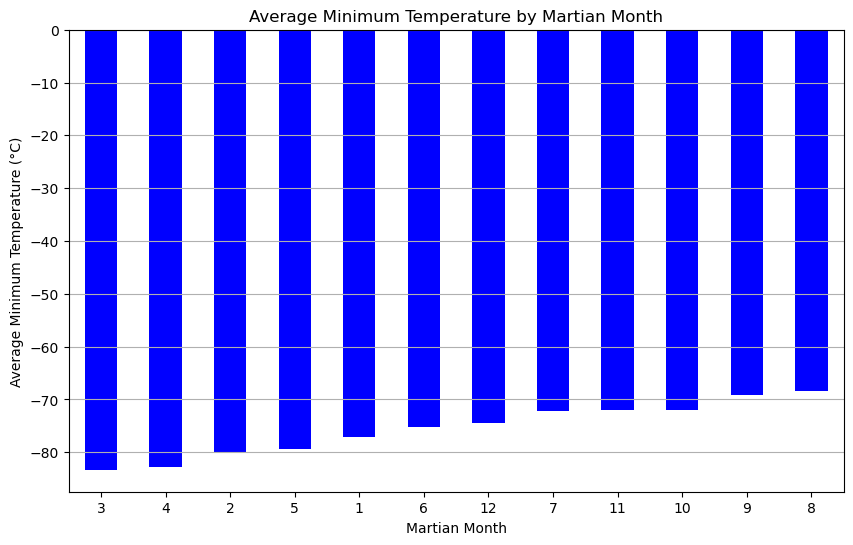

In [152]:
# Sort the data
sorted_average_min_temp = average_min_temp.sort_values()

# Plot the sorted data
sorted_average_min_temp.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('Average Minimum Temperature by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [153]:
# Find the average daily atmospheric pressure of all months
average_pressure = mars_df.groupby('month')['pressure'].mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

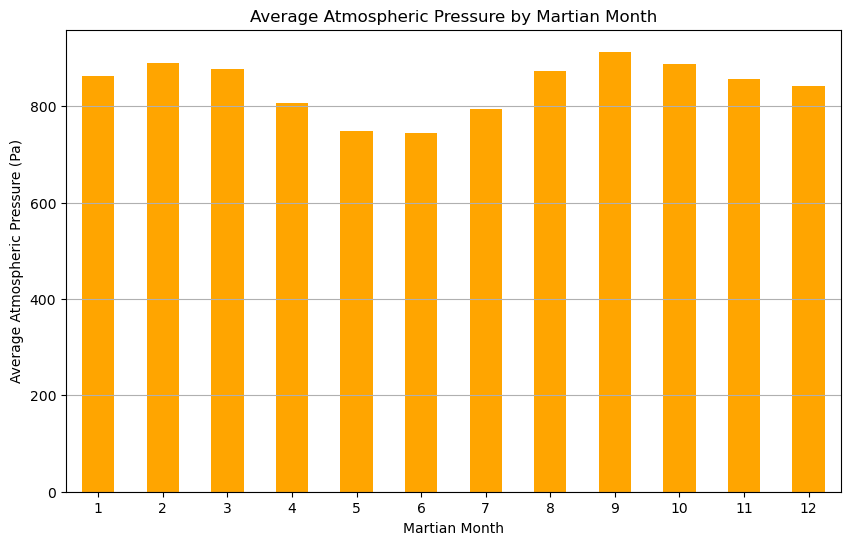

In [154]:

#graph of average minimum temperatures by the coldest and hottest months

# Plot the results as a bar chart
average_pressure.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [164]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars?

# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = average_pressure.idxmin()
highest_pressure_month = average_pressure.idxmax()
print(f"Month with lowest atmospheric pressure: Month {lowest_pressure_month}, Average Pressure: {average_pressure[lowest_pressure_month]:.2f} Pa")
print(f"Month with highest atmospheric pressure: Month {highest_pressure_month}, Average Pressure: {average_pressure[highest_pressure_month]:.2f} Pa")

Month with lowest atmospheric pressure: Month 6, Average Pressure: 745.05 Pa
Month with highest atmospheric pressure: Month 9, Average Pressure: 913.31 Pa


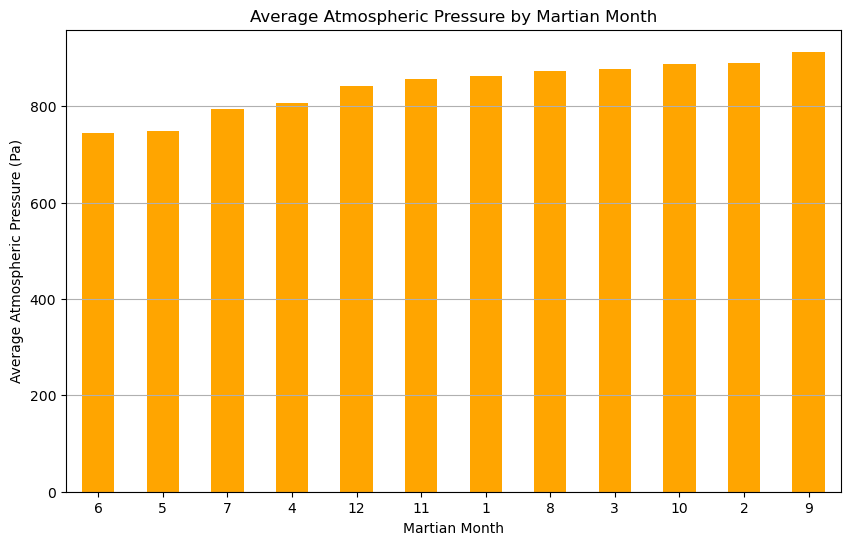

In [156]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the data
sorted_average_pressure = average_pressure.sort_values()

# Plot the sorted data
sorted_average_pressure.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Average Atmospheric Pressure by Martian Month')
plt.xlabel('Martian Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [176]:
# A Martian year is approximately 687 Earth days
martian_year_days = 687
print(f"Approximately {martian_year_days} Earth days in a Martian year.")

Approximately 687 Earth days in a Martian year.


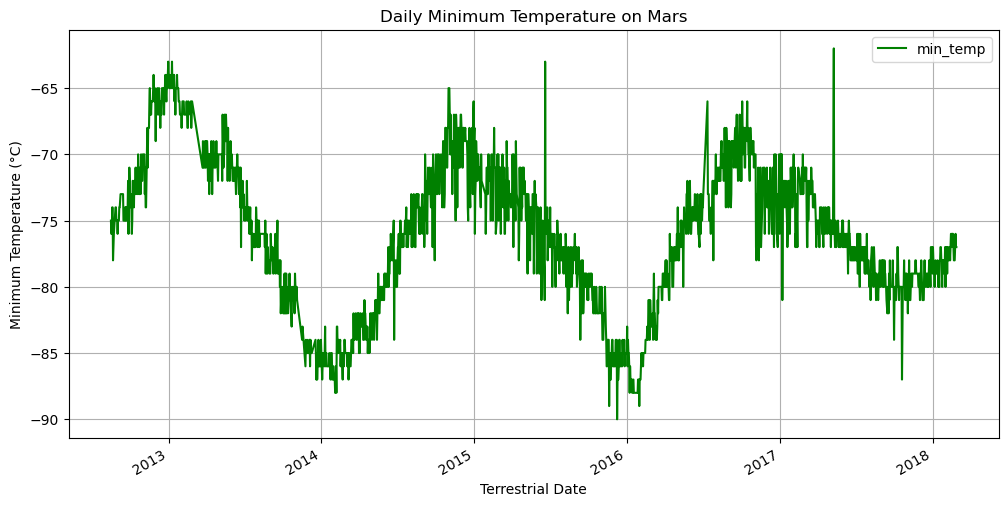

In [126]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df.plot(x='terrestrial_date', y='min_temp', kind='line', color='green', figsize=(12, 6))
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.grid()
plt.show()

#### Minimum Temperature

The highest minimum temperature by Martian month was, 82 Celcius on month 3, and the lowest minimum temperature on month 8 at 68 Celcius.

#### Atmospheric Pressure

YOUR ANALYSIS HERE

THe lowest average atmospheric pressure by Martian month was about 750pa. The highest average atmospheric pressure by Martian month was about 860pa on month number 9.

#### Year Length

There is approximately 687 Earth days in a Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [171]:
# Write the data to a CSV
mars_df.to_csv('mars_output_file.csv', index=False, header=True)

In [128]:
browser.quit()